In [25]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pylab as plt
from scipy.cluster.vq import kmeans2, whiten
import http.client
import json
from pprint import pprint
%matplotlib inline

In [3]:
def footbal_api(number, standing):
    headers = {'X-Auth-Token': 'c77fb2fa95b8400aba100d5589c49d90'}
    url = 'http://api.football-data.org/v1/competitions/{}/leagueTable'.format(number)
    response = requests.get(url, headers=headers).json()
    return response[standing]

In [12]:
teams = footbal_api(398, 'standing')
teams

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/338'}},
  'away': {'draws': 6,
   'goals': 33,
   'goalsAgainst': 18,
   'losses': 2,
   'wins': 11},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/en/6/63/Leicester02.png',
  'draws': 12,
  'goalDifference': 32,
  'goals': 68,
  'goalsAgainst': 36,
  'home': {'draws': 6,
   'goals': 35,
   'goalsAgainst': 18,
   'losses': 1,
   'wins': 12},
  'losses': 3,
  'playedGames': 38,
  'points': 81,
  'position': 1,
  'teamName': 'Leicester City FC',
  'wins': 23},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/57'}},
  'away': {'draws': 7,
   'goals': 34,
   'goalsAgainst': 25,
   'losses': 4,
   'wins': 8},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/en/5/53/Arsenal_FC.svg',
  'draws': 11,
  'goalDifference': 29,
  'goals': 65,
  'goalsAgainst': 36,
  'home': {'draws': 4,
   'goals': 31,
   'goalsAgainst': 11,
   'losses': 3,
   'wins': 12},
  'losses': 7,
  'playedGames': 38,
  'point

In [28]:
df = []
for goals in teams:
    goal = goals['goals']
    points = goals['points']
    pprint('team: {} - goals: {} ; points: {}'.format(goals['teamName'], goal, points))
    df.append({'goals': goal, 'points': points})

'team: Leicester City FC - goals: 68 ; points: 81'
'team: Arsenal FC - goals: 65 ; points: 71'
'team: Tottenham Hotspur FC - goals: 69 ; points: 70'
'team: Manchester City FC - goals: 71 ; points: 66'
'team: Manchester United FC - goals: 49 ; points: 66'
'team: Southampton FC - goals: 59 ; points: 63'
'team: West Ham United FC - goals: 65 ; points: 62'
'team: Liverpool FC - goals: 63 ; points: 60'
'team: Stoke City FC - goals: 41 ; points: 51'
'team: Chelsea FC - goals: 59 ; points: 50'
'team: Everton FC - goals: 59 ; points: 47'
'team: Swansea City FC - goals: 42 ; points: 47'
'team: Watford FC - goals: 40 ; points: 45'
'team: West Bromwich Albion FC - goals: 34 ; points: 43'
'team: Crystal Palace FC - goals: 39 ; points: 42'
'team: AFC Bournemouth - goals: 45 ; points: 42'
'team: Sunderland AFC - goals: 48 ; points: 39'
'team: Newcastle United FC - goals: 44 ; points: 37'
'team: Norwich City FC - goals: 39 ; points: 34'
'team: Aston Villa FC - goals: 27 ; points: 17'


In [41]:
pd_df = pd.DataFrame(df)

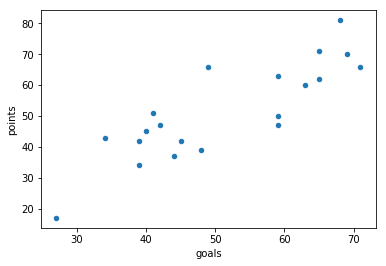

In [39]:
pd_df.plot.scatter('goals', 'points')

In [47]:
whitened = whiten(pd_df.as_matrix())

In [75]:
centroida, cluster_map_3 = kmeans2(whitened, 3)
centroida, cluster_map_5 = kmeans2(whitened, 5)

In [76]:
colors_map_3 = {0:'r', 1:'g', 2:'b'}
colors_3 = [colors_map_3[c] for c in cluster_map_3]

colors_map_5 = {0:'r', 1:'g', 2:'b', 3: 'y', 4: 'black'}
colors_5 = [colors_map_5[c] for c in cluster_map_5]

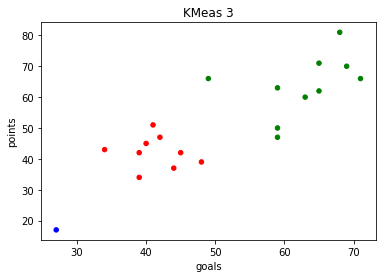

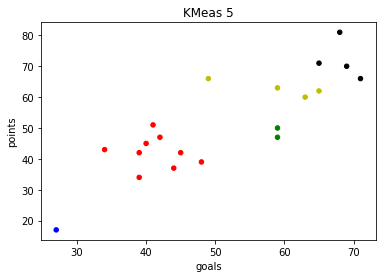

In [77]:
pd_df.plot.scatter('goals', 'points', c = colors_3, title = 'KMeas 3')
pd_df.plot.scatter('goals', 'points', c = colors_5, title = 'KMeas 5')